# Threshold
Seu significado é basicamente deixar imagens em preto e branco. Primeiro veremos o jeito simples de fazer. Esse método utiliza a função *cv2.threshold()* que usa 4 argumentos. O primeiro é a imagem, que deve ser carregada em escala cinza. O segundo argumento é o valor limite que é usado para classificar os valores de pixel. O terceiro argumento é o maxVal que representa o valor a ser fornecido se o valor do pixel for maior que (às vezes menor que) o valor limite. OpenCV fornece diferentes estilos de limite e é decidido pelo quarto parâmetro da função.  
Diferentes tipos são:  
- *cv2.THRESH_BINARY()*   
- *cv2.THRESH_BINARY_INV()*  
- *cv2.THRESH_TRUNC()*  
- *cv2.THRESH_TOZERO()*  
- *cv2.THRESH_TOZERO_INV()*    

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

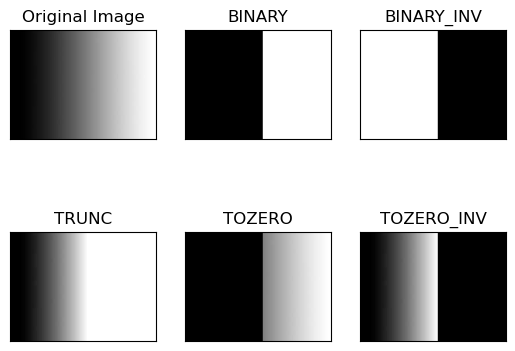

In [3]:
img = cv2.imread(r'C:\Users\Flavinho\Desktop\visao-computacional\opencv testes\operacoes avancadas\gradiente.jpeg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

Mas pode não ser bom em todas as condições em que a imagem tenha diferentes condições de iluminação em diferentes áreas. Nesse caso, optamos pelo threshold adaptativo. Neste, o algoritmo calcula o limite para pequenas regiões da imagem. Assim, obtemos limites diferentes para diferentes regiões da mesma imagem e isso nos dá melhores resultados para imagens com iluminação variável.  
  
Possui três parâmetros de entrada ‘especiais’ e apenas um argumento de saída.

Método Adaptativo - Decide como o valor limite é calculado.  
**cv2.ADAPTIVE_THRESH_MEAN_C**: o valor limite é a média da área da vizinhança.  
**cv2.ADAPTIVE_THRESH_GAUSSIAN_C**: o valor limite é a soma ponderada dos valores da vizinhança onde os pesos são uma janela gaussiana.  
**Tamanho do Bloco** - Decide o tamanho da área do bairro.  
  
**C** - É apenas uma constante que é subtraída da média ou média ponderada calculada.

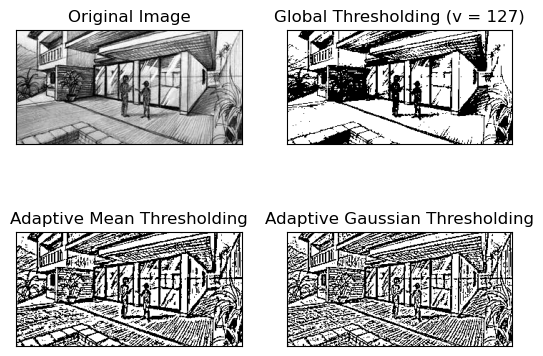

In [16]:
img = cv2.imread(r'C:\Users\Flavinho\Desktop\visao-computacional\opencv testes\operacoes avancadas\perspectiva2.jpeg',0)
img = cv2.medianBlur(img,1)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()